# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np 
#importer numpy

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))
#avoir aleatoirement un nb entre 1 et 6

In [3]:
Roll()

3

### Compléter le code et commenter

In [4]:
A=0 #position pion
NA=0 #nombre de coup
S=10 #la langueuur de la chaine
temp=0 #temp define le nombre obtenulors de la lancer 
NA+=1 #incrimentation
print('temp ={} | NA={} '.format(temp,NA)) #affichage 
A=1 
while (A<S) :# boucle while pour tester la position du pion par rapport au  fin du jeux
    temp = Roll() #appel a la fonction Roll() pour deplacer le dé de sa position initiale jusqu'à ce qu'il atteigne la cible
    NA+=1
    if A+temp == S : 
        A=S 
        print('temp ={} | NA={} | A={} '.format(temp,NA,A)) #affichage 
        break
        
    elif A+temp<S :
        A=A+temp
        print('temp ={} | NA={} |A={} '.format(temp,NA,A)) #affichage 
    else :
        print('temp ={} | NA={} |A={} '.format(temp,NA,A)) #affichage 
        
        
        

temp =0 | NA=1 
temp =6 | NA=2 |A=7 
temp =3 | NA=3 | A=10 


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [5]:
#la fonction sim détermine le nombre de coup nécessaire pour sortir du prison et atteindre la ciblepour un nombre S de pas pour atteindre la cible 
def sim (S) : 
    A=0 #position pion
    NA=0 #nombre de coup
    c=0
    temp = Roll()
    NA+=1 #incrementation
    while temp!=6 :  
        temp=Roll() #appel a la fonction Roll() pour deplacer le dé de sa position 
        NA+=1 
    A=1 
    while  A<S : 
        temp = Roll() 
        if temp+A<S : 
            NA+=1 
            A+=temp 
        elif temp+A>S : 
            NA+=1
        else :
            A=S
            NA+=1 
    return NA

In [6]:
sim(30)

16

In [7]:
#on calcul la moyenne de coup qu'on peut avoir ,pour arriver à un cible de S pas pour un simulation de 5000
L= [sim(30) for i in range(5000)]
moy=sum(L)/5000
print('estimation de la moyenne de X_30={}'.format(moy))


estimation de la moyenne de X_30=19.0592


### Simulation de $10^5$  scénario 

In [8]:
# on simule le jeu pour n entre 10 et 20 
# on calcule la moyenne de chaque simulation et on met le resultat dans le tableau y
x=list(range(10,20))
print(x)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [9]:
y=[sum([sim(u) for i in range(10000)])/10000 for u in x]
print(y)

[13.3939, 13.5802, 13.7953, 14.1295, 14.6015, 14.8735, 15.0282, 15.3244, 15.6676, 15.7552]


In [10]:
import matplotlib.pyplot as plt 

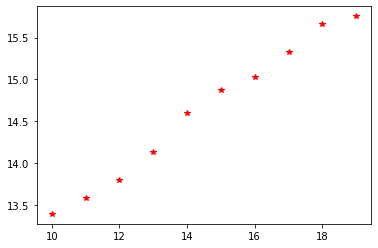

In [11]:
plt.plot(x,y,'*r')
plt.show() 
#on represente les resultats obtenu dans la courbe 

In [12]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [13]:
slope #la pente de la fonction

0.281679393939394

In [14]:
intercept #b l ordonne a l'origine 

10.530578787878788

In [15]:
yy=[slope*u + intercept for u in x]

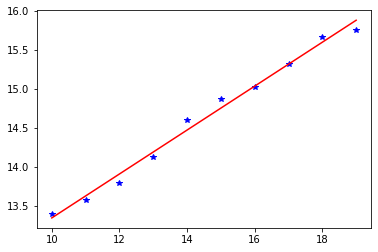

In [16]:
plt.plot(x, y, "b*", x, yy, 'r-')
plt.show()

In [17]:
#conclusion
#Aprés l'analyse des courbes et des valeurs obtenu suite à la simulation, on peut conclure que l'éspérance mathématique du jeu Ludo est une fonction linéaire